<a href="https://colab.research.google.com/github/cxbxmxcx/DeepLearningBeginnings/blob/master/DeepLearningTensorFlow_BERT_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install ktrain

In [0]:
import ktrain
from ktrain import text

ktrain.__version__

using Keras version: 2.2.4-tf


'0.7.2'

In [0]:
import tensorflow as tf
dataset = tf.keras.utils.get_file(
    fname="aclImdb.tar.gz", 
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
    extract=True,
)

# set path to dataset
import os.path
#dataset = '/root/.keras/datasets/aclImdb'
IMDB_DATADIR = os.path.join(os.path.dirname(dataset), 'aclImdb')
print(IMDB_DATADIR)

/root/.keras/datasets/aclImdb


In [0]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(IMDB_DATADIR, 
                                                                       maxlen=150, 
                                                                       preprocess_mode='bert',
                                                                       train_test_names=['train', 
                                                                                         'test'],
                                                                       classes=['pos', 'neg'])
print(y_train)

detected encoding: utf-8
preprocessing train...
language: en


preprocessing test...
language: en


[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [0]:
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model,train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6)

Is Multi-Label? False
maxlen is 150
done.


simulating training for different learning rates... this may take a few moments...
Train on 25000 samples
Epoch 1/1024
 7188/25000 [=======>......................] - ETA: 21:26 - loss: 0.7492 - acc: 0.6052

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


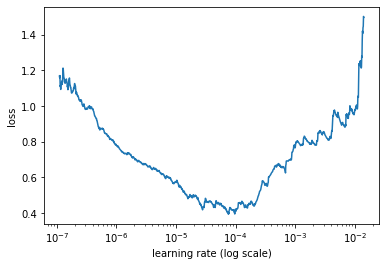

In [0]:
learner.lr_find()
learner.lr_plot()

In [0]:
learner.autofit(2e-5, 1)



begin training using triangular learning rate policy with max lr of 2e-05...
Train on 25000 samples, validate on 25000 samples
25000/25000 [==============================] - 2306s 92ms/sample - loss: 0.3308 - acc: 0.8530 - val_loss: 0.2496 - val_acc: 0.8958


['neg', 'pos', 'neg', 'pos']

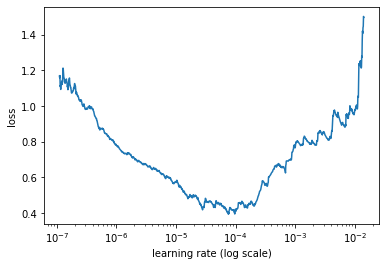

In [0]:
learner.lr_plot()

predictor = ktrain.get_predictor(learner.model, preproc)

data = [ 'I am glad the popcorn was good, but my seat was still uncomfortable.',
         'That actor was fantastic, if he were a rock.',
        'Graphics were amazing but the story lacked character.',
        'This movie made me think why do things matter?',
         ]


predictor.predict(data)